# Notebook Imports / Config

In [1]:
from datetime import datetime
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook

%load_ext line_profiler
%load_ext Cython
%matplotlib inline
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# SparseHC-Inspired Clustering Method

Paper: https://www.sciencedirect.com/science/article/pii/S1877050914001781

## Cython implementation -- 2d proof of concept

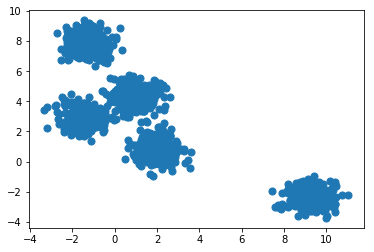

In [4]:
size=1250
X, y_true = make_blobs(n_samples=size, centers=5,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sparse_hc_clustering import SparseHC

In [ ]:
test_sparse_hc = SparseHC(X)

In [ ]:
%%time
test_sparse_hc.fit()

In [ ]:
cluster_obs = {}
for i in np.arange(0, size):
    cluster_obs[i] = [i]

cluster_labels = np.arange(0, size)

cluster_id = size * 1 

for children in test_sparse_hc.children:
    child_0 = children[0]
    child_1 = children[1]
    if((child_0 == -1) or (child_1 == -1)):
        continue

    cluster_obs[cluster_id] = cluster_obs[child_0] + cluster_obs[child_1]
    del cluster_obs[child_0]
    del cluster_obs[child_1]

    for obs in cluster_obs[cluster_id]:
        cluster_labels[obs] = cluster_id
        
    if len(cluster_obs) in [1000, 750, 250, 100, 50, 25, 10, 5, 2, 1]:
        print('%d clusters' % (len(cluster_obs)))
        plt.scatter(X[:, 0], X[:, 1], s=50, cmap=plt.cm.Set3, c=cluster_labels%25)
        plt.show()
        plt.close()
    
    cluster_id += 1

## Vs. DBSCAN

In [2]:
import DBSCAN_multiplex as DB

In [49]:
minpts = 100
# N_iterations = 1000
# N_sub = 9 * X.shape[0] // 10
# subsamples_matrix = np.zeros((N_iterations, N_sub), dtype = int)
# for i in range(N_iterations): 
#     subsamples_matrix[i] = np.random.choice(X.shape[0], N_sub, replace = False)

In [50]:
%%time
eps, labels_matrix = DB.DBSCAN(X, minPts=minpts, verbose=False)


CPU times: user 322 ms, sys: 176 ms, total: 498 ms
Wall time: 621 ms


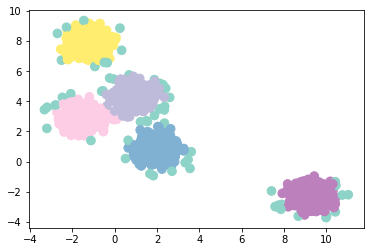

In [52]:
plt.scatter(X[:, 0], X[:, 1], s=75, cmap=plt.cm.Set3, c=labels_matrix[0])
plt.show()
plt.close()

## Vs. Sklearn

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [20]:
%%time
knn_graph = kneighbors_graph(X, 100, include_self=False)

CPU times: user 23.2 ms, sys: 16 ms, total: 39.2 ms
Wall time: 55.9 ms


In [22]:
%%time
ac_model = AgglomerativeClustering(
    affinity='euclidean',
    linkage='ward',
    connectivity=knn_graph
)
ac_model.fit(X)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


CPU times: user 880 ms, sys: 39.5 ms, total: 919 ms
Wall time: 943 ms


1000 clusters


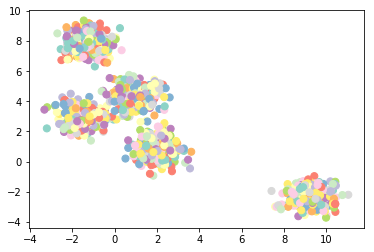

750 clusters


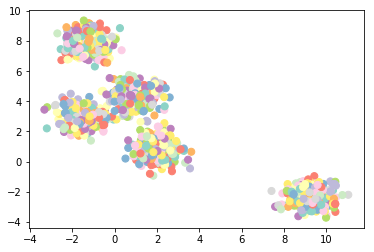

250 clusters


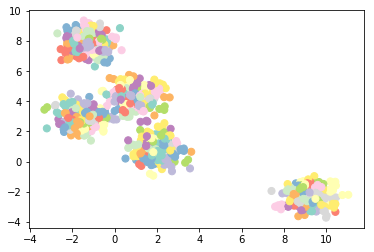

100 clusters


50 clusters


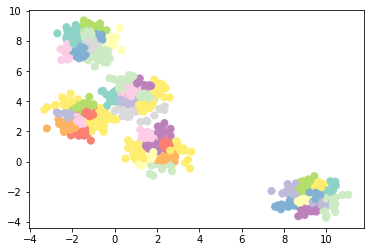

25 clusters


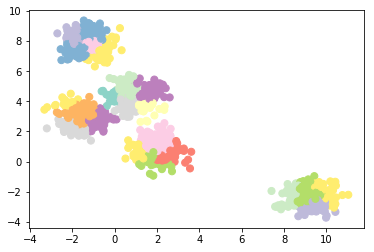

10 clusters


5 clusters


2 clusters


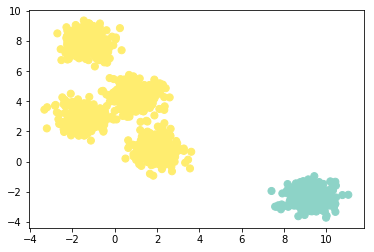

1 clusters


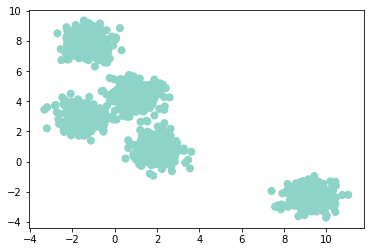

In [23]:
cluster_obs = {}
for i in np.arange(0, size):
    cluster_obs[i] = [i]

cluster_labels = np.arange(0, size)

cluster_id = size * 1 

for children in ac_model.children_:
    child_0 = children[0]
    child_1 = children[1]
    if((child_0 == -1) or (child_1 == -1)):
        continue

    cluster_obs[cluster_id] = cluster_obs[child_0] + cluster_obs[child_1]
    del cluster_obs[child_0]
    del cluster_obs[child_1]

    for obs in cluster_obs[cluster_id]:
        cluster_labels[obs] = cluster_id
        
    if len(cluster_obs) in [1000, 750, 250, 100, 50, 25, 10, 5, 2, 1]:
        print('%d clusters' % (len(cluster_obs)))
        plt.scatter(X[:, 0], X[:, 1], s=50, cmap=plt.cm.Set3, c=cluster_labels%25)
        plt.show()
        plt.close()
    
    cluster_id += 1

## Cython implementation -- in 300d

In [70]:
size = 7500
dim = 300

In [71]:
X = np.random.rand(size, dim)

In [30]:
test_sparse_hc = SparseHC(X)

In [ ]:
%%time
test_sparse_hc.fit()

## Vs. DBSCAN

In [72]:
minpts = 100
# N_iterations = 1000
# N_sub = 9 * X.shape[0] // 10
# subsamples_matrix = np.zeros((N_iterations, N_sub), dtype = int)
# for i in range(N_iterations): 
#     subsamples_matrix[i] = np.random.choice(X.shape[0], N_sub, replace = False)

In [73]:
%%time
eps, labels_matrix = DB.DBSCAN(X, minPts=minpts, verbose=False)


CPU times: user 6min 16s, sys: 1.22 s, total: 6min 17s
Wall time: 6min 18s


## Vs. Sklearn

In [56]:
%%time
knn_graph = kneighbors_graph(X, 250, include_self=False)

CPU times: user 194 ms, sys: 23.8 ms, total: 218 ms
Wall time: 218 ms


In [57]:
%%time
ac_model = AgglomerativeClustering(
    affinity='euclidean',
    linkage='ward',
    connectivity=knn_graph
)
ac_model.fit(X)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


CPU times: user 11.5 s, sys: 453 ms, total: 12 s
Wall time: 12 s
